In [82]:
import typing
import json
import glob

import numpy
import pandas 

import statsmodels
import statsmodels.stats
import statsmodels.stats.descriptivestats

import scipy
import scipy.spatial.distance

import seaborn


In [72]:
MODELS: typing.List[str] = [
    "llama3.1-8b",
    "llama3.3-70b",
    "mistral-7b",
    "mistral-large-123b",
    "qwen2.5-7b",
    "qwen2.5-72b"
]

In [73]:
raw: typing.Dict[str, pandas.DataFrame]= {
    **{
        model: (
                pandas.concat(
                [
                    pandas.json_normalize(json.load(open(file))).assign(participant=n)
                    for n, file in enumerate(glob.glob(f"data/base/{model}/*.json", recursive=True))
                ],
            )
            .pivot(index="participant", columns="id", values="response")
            .apply(pandas.to_numeric)
        )
        for model in MODELS
    },
    "human_full": (
        pandas.read_csv("../../../data/humor_styles/survey.csv")
        .rename_axis(index="participant")
        .filter(like='Q', axis=1)
        .pipe(lambda _df: (
            _df
            .rename(columns={col: col[1:] for col in _df.columns})
        ))
        .replace(-1, None)
        .apply(pandas.to_numeric)
    ),
    "random": (
        pandas.DataFrame(numpy.random.randint(0,5, (1000, 32)), columns=range(1,33))
        .rename_axis(index="participant")
    )
}

raw.keys()

dict_keys(['llama3.1-8b', 'llama3.3-70b', 'mistral-7b', 'mistral-large-123b', 'qwen2.5-7b', 'qwen2.5-72b', 'human_full', 'random'])

In [74]:
for key, values in raw.items():
    print(key)
    print("=" * 32)
    print(values.to_csv(index=False))
    print("=" * 32)

llama3.1-8b
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
2.0,3.0,1.0,3.0,2.0,4.0,5.0,3.0,2.0,5.0,4.0,1.0,,3.0,5.0,4.0,3.0,3.0,3.0,5.0,4.0,4.0,5.0,,4.0,4.0,4.0,4.0,3.0,5.0,4.0,5.0
2.0,2.0,1.0,1.0,3.0,4.0,1.0,4.0,2.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,1.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,2.0,4.0,5.0,5.0,3.0,5.0,5.0,5.0
1.0,2.0,4.0,4.0,3.0,5.0,4.0,3.0,2.0,4.0,4.0,4.0,5.0,5.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,1.0,4.0,5.0,5.0,
1.0,1.0,4.0,2.0,4.0,5.0,2.0,2.0,2.0,5.0,5.0,2.0,4.0,5.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,4.0,4.0,1.0,5.0,3.0,1.0,4.0,5.0,5.0,4.0
1.0,5.0,5.0,5.0,4.0,5.0,,3.0,2.0,4.0,4.0,5.0,4.0,5.0,5.0,3.0,4.0,4.0,3.0,3.0,4.0,2.0,5.0,5.0,4.0,5.0,2.0,4.0,3.0,4.0,4.0,5.0
5.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,4.0,3.0,5.0,4.0,2.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,5.0,5.0,5.0
2.0,5.0,4.0,5.0,1.0,3.0,1.0,5.0,2.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0,3.0,5.0,5.0,4.0,3.0,4.0,3.0,4.0,5.0,4.0,2.0,4.0,4.0,5.0,3.0
4.0,5.0,2.0,2.0,3

In [60]:
descriptive = pandas.concat({
    key: statsmodels.stats.descriptivestats.describe(values).T
    for key, values in raw.items()
})
descriptive

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.10/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.10/site-packages/statsmodels/stats/stattools.py:126: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis = 3 + stats.kurtosis(resids, axis=axis)
/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.10/site-packages/statsmodels/stats/stattools.py:125: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew = stats.skew(resids, axis=axis)
/home/ubun

nobs  missing      mean   std_err  upper_ci  lower_ci  \
llama3.1-8b 1   1000.0     14.0  2.280933  0.036799  2.353058  2.208808   
            2   1000.0     11.0  2.984833  0.040777  3.064755  2.904911   
            3   1000.0     10.0  2.612121  0.047262  2.704753  2.519489   
            4   1000.0      5.0  2.858291  0.041374  2.939383  2.777200   
            5   1000.0     11.0  4.029323  0.025395  4.079095  3.979550   
...                ...      ...       ...       ...       ...       ...   
random      28  1000.0      0.0  1.953000  0.044122  2.039477  1.866523   
            29  1000.0      0.0  2.127000  0.045309  2.215804  2.038196   
            30  1000.0      0.0  1.882000  0.045300  1.970787  1.793213   
            31  1000.0      0.0  1.972000  0.043533  2.057323  1.886677   
            32  1000.0      0.0  2.005000  0.045067  2.093329  1.916671   

                     std  iqr  iqr_normal       mad  ...  median   1%   5%  \
llama3.1-8b 1   1.155513  2.0    1.482602  0.945256  ...     2.0  1.0  1.0   
            2   1.282383  2.0    1.482602  1.049594  ...     3.0  1.0  1.0   
            3   1.487071  3.0    2.223903  1.363832  ...     2.0  1.0  1.0   
            4   1.305082  2.0    1.482602  1.141808  ...     3.0  1.0  1.0   
            5   0.798626  2.0    1.482602  0.592810  ...     4.0  2.0  3.0   
...                  ...  ...         ...       ...  ...     ...  ...  ...   
random      28  1.395255  2.0    1.482602  1.181648  ...     2.0  0.0  0.0   
            29  1.432803  2.0    1.482602  1.240716  ...     2.0  0.0  0.0   
            30  1.432525  2.0    1.482602  1.239924  ...     2.0  0.0  0.0   
            31  1.376630  2.0    1.482602  1.159824  ...     2.0  0.0  0.0   
            32  1.425134  2.0    1.482602  1.217980  ...     2.0  0.0  0.0   

                10%  25%  50%  75%  90%  95%  99%  
llama3.1-8b 1   1.0  1.0  2.0  3.0  4.0  4.0  5.0  
            2   1.0  2.0  3.0  4.0  5.0  5.0  5.0  
            3   1.0  1.0  2.0  4.0  5.0  5.0  5.0  
            4   1.0  2.0  3.0  4.0  4.0  5.0  5.0  
            5   3.0  3.0  4.0  5.0  5.0  5.0  5.0  
...             ...  ...  ...  ...  ...  ...  ...  
random      28  0.0  1.0  2.0  3.0  4.0  4.0  4.0  
            29  0.0  1.0  2.0  3.0  4.0  4.0  4.0  
            30  0.0  1.0  2.0  3.0  4.0  4.0  4.0  
            31  0.0  1.0  2.0  3.0  4.0  4.0  4.0  
            32  0.0  1.0  2.0  3.0  4.0  4.0  4.0  

[256 rows x 31 columns]

In [76]:
raw["human_sampled"] = (
    pandas.DataFrame(numpy.stack([
        numpy.random.normal(row["mean"], row["std"], 1000).astype(int)
        for _, row in descriptive.loc["human"][["mean", "std"]].iterrows()
    ], axis=1), columns=range(1,33))
    .rename_axis(index="participant")
)

In [62]:
pandas.concat({
    (key_1, key_2): (
        pandas.Series(
            scipy
            .stats.f_oneway(
                values_1,
                values_2,
                nan_policy="omit"
            )
            .pvalue
            > 0.05,
            name="f_oneway_significant"
        )
        .value_counts()
    )
    for key_1, values_1 in raw.items()
    for key_2, values_2 in raw.items()
}).to_frame()

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:618: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, axis=axis, **kwds)
/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:634: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  return result_to_tuple(hypotest_fun_out(*samples, **kwds), n_out)


count
                                      f_oneway_significant       
llama3.1-8b        llama3.1-8b        True                     23
                                      False                     9
                   llama3.3-70b       False                    31
                                      True                      1
                   mistral-7b         False                    30
...                                                           ...
human_item_sampled qwen2.5-72b        True                      2
                   human              False                    32
                   random             False                    30
                                      True                      2
                   human_item_sampled True                     32

[142 rows x 1 columns]

In [86]:
sim = (
    pandas.concat({
        (key_1, key_2): pandas.Series(
            (
                1 - scipy.spatial.distance.cosine(
                    numpy.triu(values_1.corr("pearson").fillna(0.0).to_numpy()).ravel(), 
                    numpy.triu(values_2.corr("pearson").fillna(0.0).to_numpy()).ravel()
                )
            ),
            name="similarity"
        )
        for key_1, values_1 in raw.items()
        for key_2, values_2 in raw.items()
    })
    .to_frame()
    .reset_index(level=[0, 1])
    .pivot_table(values="similarity", index="level_0", columns="level_1")
    .reindex(
        columns=(idx := ["random", "human_sampled", "human_full", *MODELS]),
        index=idx
        )
)

(
    sim
    .style
    .background_gradient(axis=None)
    .format(precision=3)  
)

level_1,random,human_sampled,human_full,llama3.1-8b,llama3.3-70b,mistral-7b,mistral-large-123b,qwen2.5-7b,qwen2.5-72b
level_0,,,,,,,,,
random,1.000,0.984,0.762,0.985,0.678,0.977,0.969,0.984,0.952
human_sampled,0.984,1.000,0.750,0.985,0.678,0.977,0.970,0.986,0.954
human_full,0.762,0.750,1.000,0.755,0.519,0.747,0.736,0.755,0.725
llama3.1-8b,0.985,0.985,0.755,1.000,0.679,0.977,0.971,0.984,0.953
llama3.3-70b,0.678,0.678,0.519,0.679,1.000,0.673,0.668,0.678,0.701
mistral-7b,0.977,0.977,0.747,0.977,0.673,1.000,0.961,0.979,0.948
mistral-large-123b,0.969,0.970,0.736,0.971,0.668,0.961,1.000,0.970,0.937
qwen2.5-7b,0.984,0.986,0.755,0.984,0.678,0.979,0.970,1.000,0.955
qwen2.5-72b,0.952,0.954,0.725,0.953,0.701,0.948,0.937,0.955,1.000


<Axes: xlabel='level_1', ylabel='level_0'>

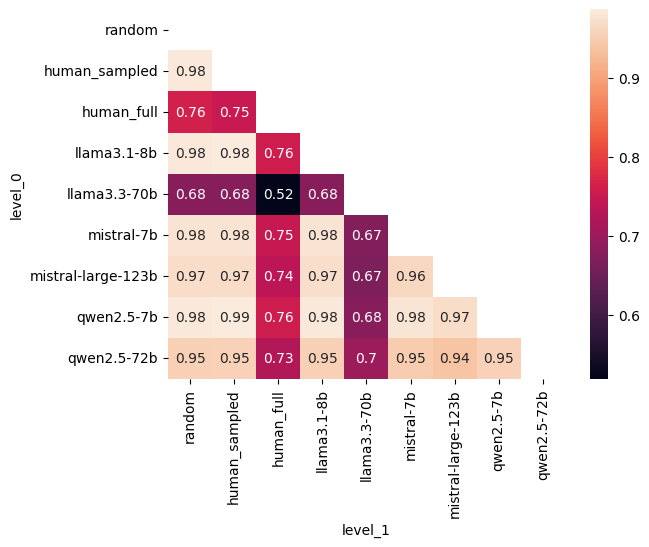

In [87]:
seaborn.heatmap(sim, annot=True, mask=numpy.triu(sim))

In [17]:
human_chunked = {
    f"Sample {n:02d}": chunk
    for n, chunk in enumerate(numpy.array_split(raw["human"], 7), start=1)
}

sim = (
    pandas.concat({
        (key_1, key_2): pandas.Series(
            (
                1 - scipy.spatial.distance.cosine(
                    values_1.corr("pearson").fillna(0.0).to_numpy().ravel(), 
                    values_2.corr("pearson").fillna(0.0).to_numpy().ravel()
                )
            ),
            name="similarity"
        )
        for key_1, values_1 in human_chunked.items()
        for key_2, values_2 in human_chunked.items()
    })
    .to_frame()
    .reset_index(level=[0,1])
    .pivot_table(values="similarity", index="level_0", columns="level_1")
    #
    .style
    .background_gradient(axis=None)
    .format(precision=3)  
)
sim

/home/ubuntu/repositories/LLM-Questionnaires/.venv/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


level_1,Sample 01,Sample 02,Sample 03,Sample 04,Sample 05,Sample 06,Sample 07
level_0,,,,,,,
Sample 01,1.000,0.929,0.941,0.925,0.924,0.928,0.933
Sample 02,0.929,1.000,0.920,0.918,0.904,0.915,0.933
Sample 03,0.941,0.920,1.000,0.919,0.913,0.918,0.923
Sample 04,0.925,0.918,0.919,1.000,0.910,0.919,0.923
Sample 05,0.924,0.904,0.913,0.910,1.000,0.924,0.918
Sample 06,0.928,0.915,0.918,0.919,0.924,1.000,0.926
Sample 07,0.933,0.933,0.923,0.923,0.918,0.926,1.000
